### 1. Introduction

- **Background and Objective :** 

Speed dating is a captivating process that enables individuals to meet a variety of potential partners in a short span of time. This analysis aims to understand the various factors that influence successful matches and explore individual dynamics and preferences within the speed dating experience. The marketing team of a dating app requires assistance for a new project, as they are experiencing a decline in match rates and are seeking insights into what makes people interested in each other.

- **Data Import :**

We will employ Python's Pandas library to import the dataset and conduct subsequent data manipulations. Further, we will leverage additional libraries such as Numpy, Seaborn, and Matplotlib to transform the data and make it conducive for visualization.

- **Dataset Overview :** 

The dataset contains 8,378 observations and 195 variables, covering a broad range of aspects related to speed dating, such as personal attributes, interests, preferences, and ratings received from partners. The participants are roughly evenly distributed between males (50.3%) and females (49.7%). The age of participants ranges from 18 to 55 years, with an average age of approximately 26 years. Participants come from diverse educational backgrounds, including law, mathematics, social sciences, medicine, engineering, education, arts, and others.

### 2. Data and Library Import

In [1]:
# Loading Required Libraries for Our Study

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
# Importing the Dataset

df = pd.read_csv("/Users/arvind.b/Documents/Jedha DA/05-Exploratory Data Analysis/D5-Speed Dating Project/DS_speed_dating.csv", encoding = "unicode_escape")

# Data Preview

df.describe(include = 'all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 3. Data Cleaning and Preparation

- **Missing Value Analysis :** Identification and handling of missing values.

There are several columns with missing values in our dataset. Here are the top 10 columns with the highest percentage of missing values :

In [3]:
# Calculate and display the percentage of missing values for each column

missing_values_percentage = df.isnull().mean() * 100
missing_values_summary = pd.DataFrame({'Column': missing_values_percentage.index, 'Missing Values': missing_values_percentage.values})
missing_values_summary = missing_values_summary[missing_values_summary['Missing Values'] > 0].sort_values(by = 'Missing Values', ascending = False)

# Display the top 10 columns with the highest percentage of missing values

missing_values_summary.head(10)


,Column,Missing Values
160,num_in_3,92.026737
159,numdat_3,82.143710
68,expnum,78.515159
123,sinc7_2,76.665075
126,amb7_2,76.665075
127,shar7_2,76.438291
122,attr7_2,76.318931
124,intel7_2,76.318931
125,fun7_2,76.318931
194,amb5_3,75.936978


These columns require special attention during the data cleaning process. Depending on the significance of these variables for the analysis, we may opt to impute them, ignore them, or employ other methods to handle them.

### 4. Univariate Analysis

What is the age distribution of the participants ?

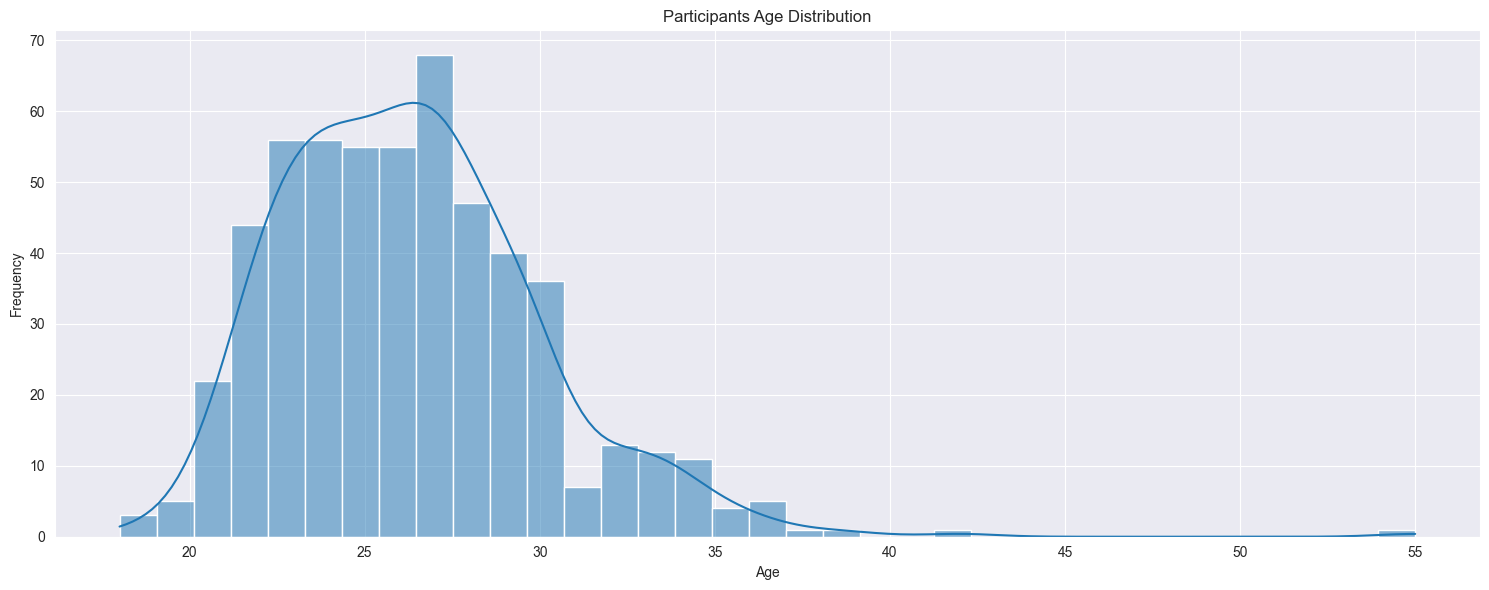

In [4]:
sns.set_style("darkgrid")

unique_ages = df.drop_duplicates(subset=['iid'])['age'].dropna()

# Age Distribution of Participants

plt.figure(figsize = (15, 6))
sns.histplot(unique_ages, bins = 35, kde = True)
plt.title('Participants Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Observation: The age distribution of participants appears to be approximately normal, with the majority of participants aged between 20 and 30.

How many participants have received a match (where 'match' = 1) ?

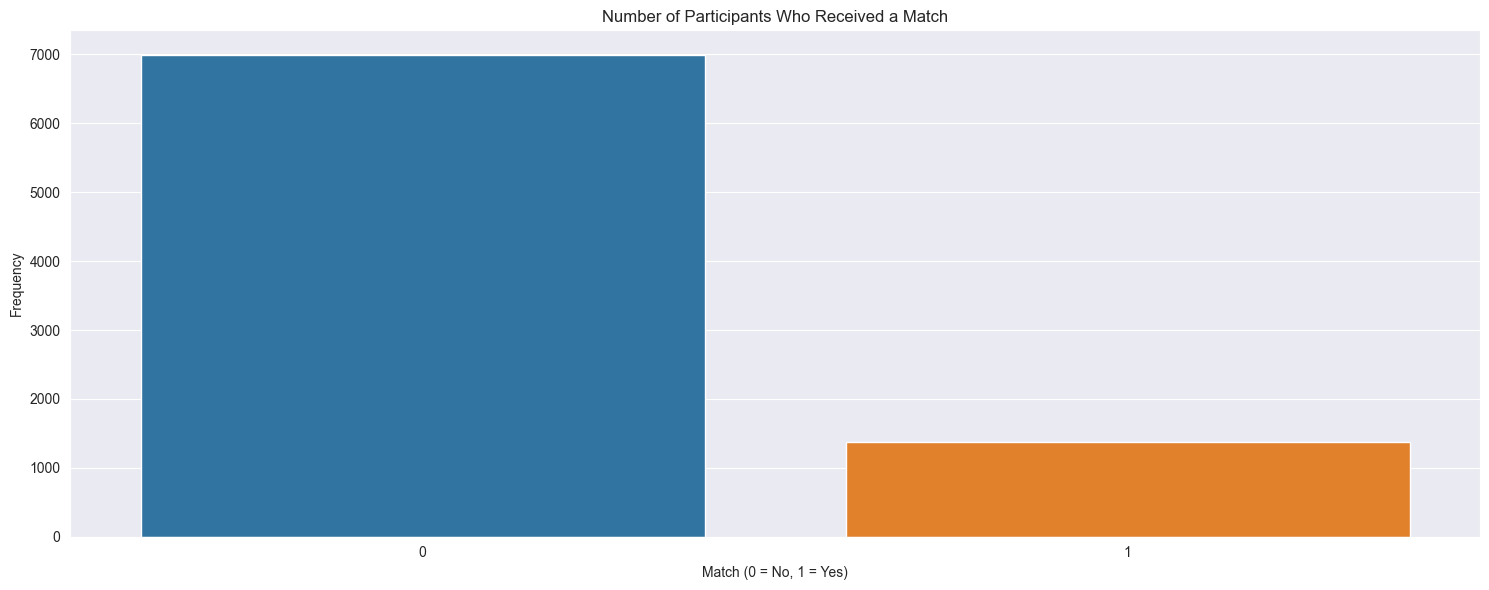

In [5]:
# Count of Participants Who Received a Match

plt.figure(figsize = (15, 6))
sns.countplot(data = df, x = 'match')
plt.title('Number of Participants Who Received a Match')
plt.xlabel('Match (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Observation: The chart shows that the majority of participants did not get a match (where 'match' = 0). This implies that in most cases either the participant, their partner, or both decided not to proceed with a second date.

What is the distribution of attractiveness scores (attr_o) given by partners ?

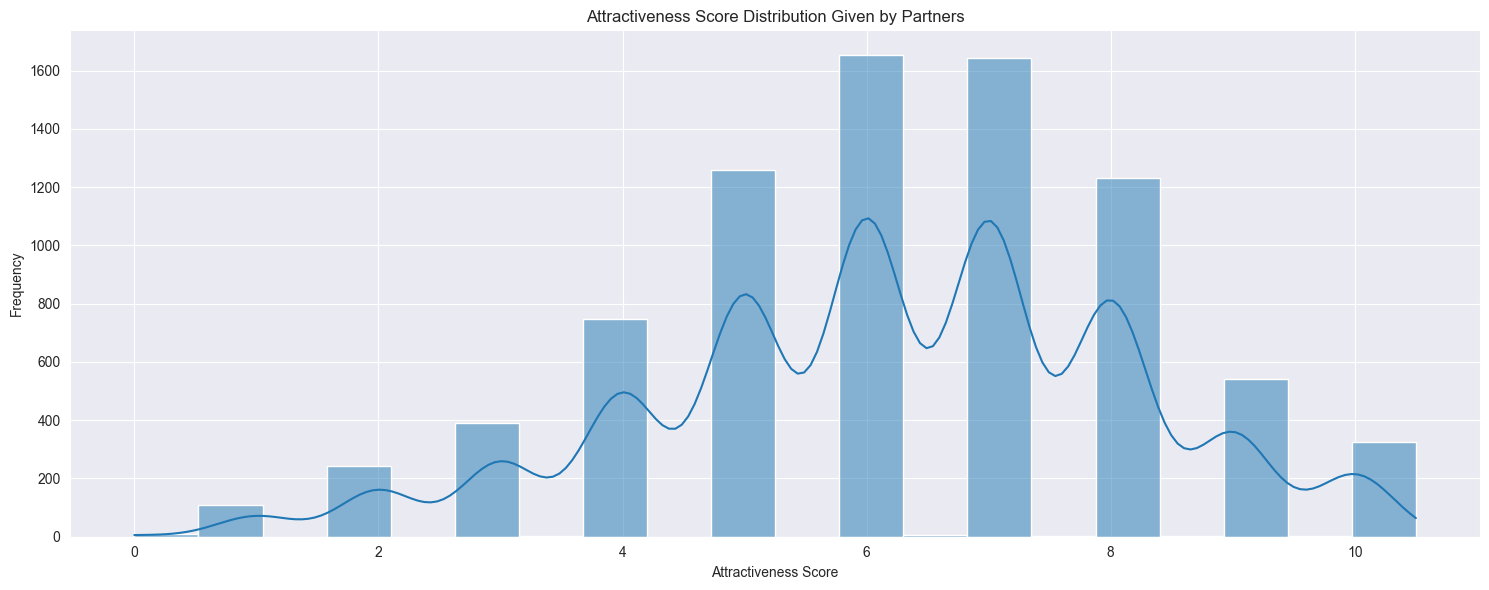

In [6]:
# Distribution of Attractiveness Scores Given by Partners

plt.figure(figsize = (15, 6))
sns.histplot(df['attr_o'].dropna(), bins = 20, kde = True)
plt.title('Attractiveness Score Distribution Given by Partners')
plt.xlabel('Attractiveness Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Observation: The distribution of attractiveness scores given by partners appears to be slightly right-skewed, with the majority of scores falling between 5 and 8.

What is the distribution of stated preferences for each attribute, separated by gender ?

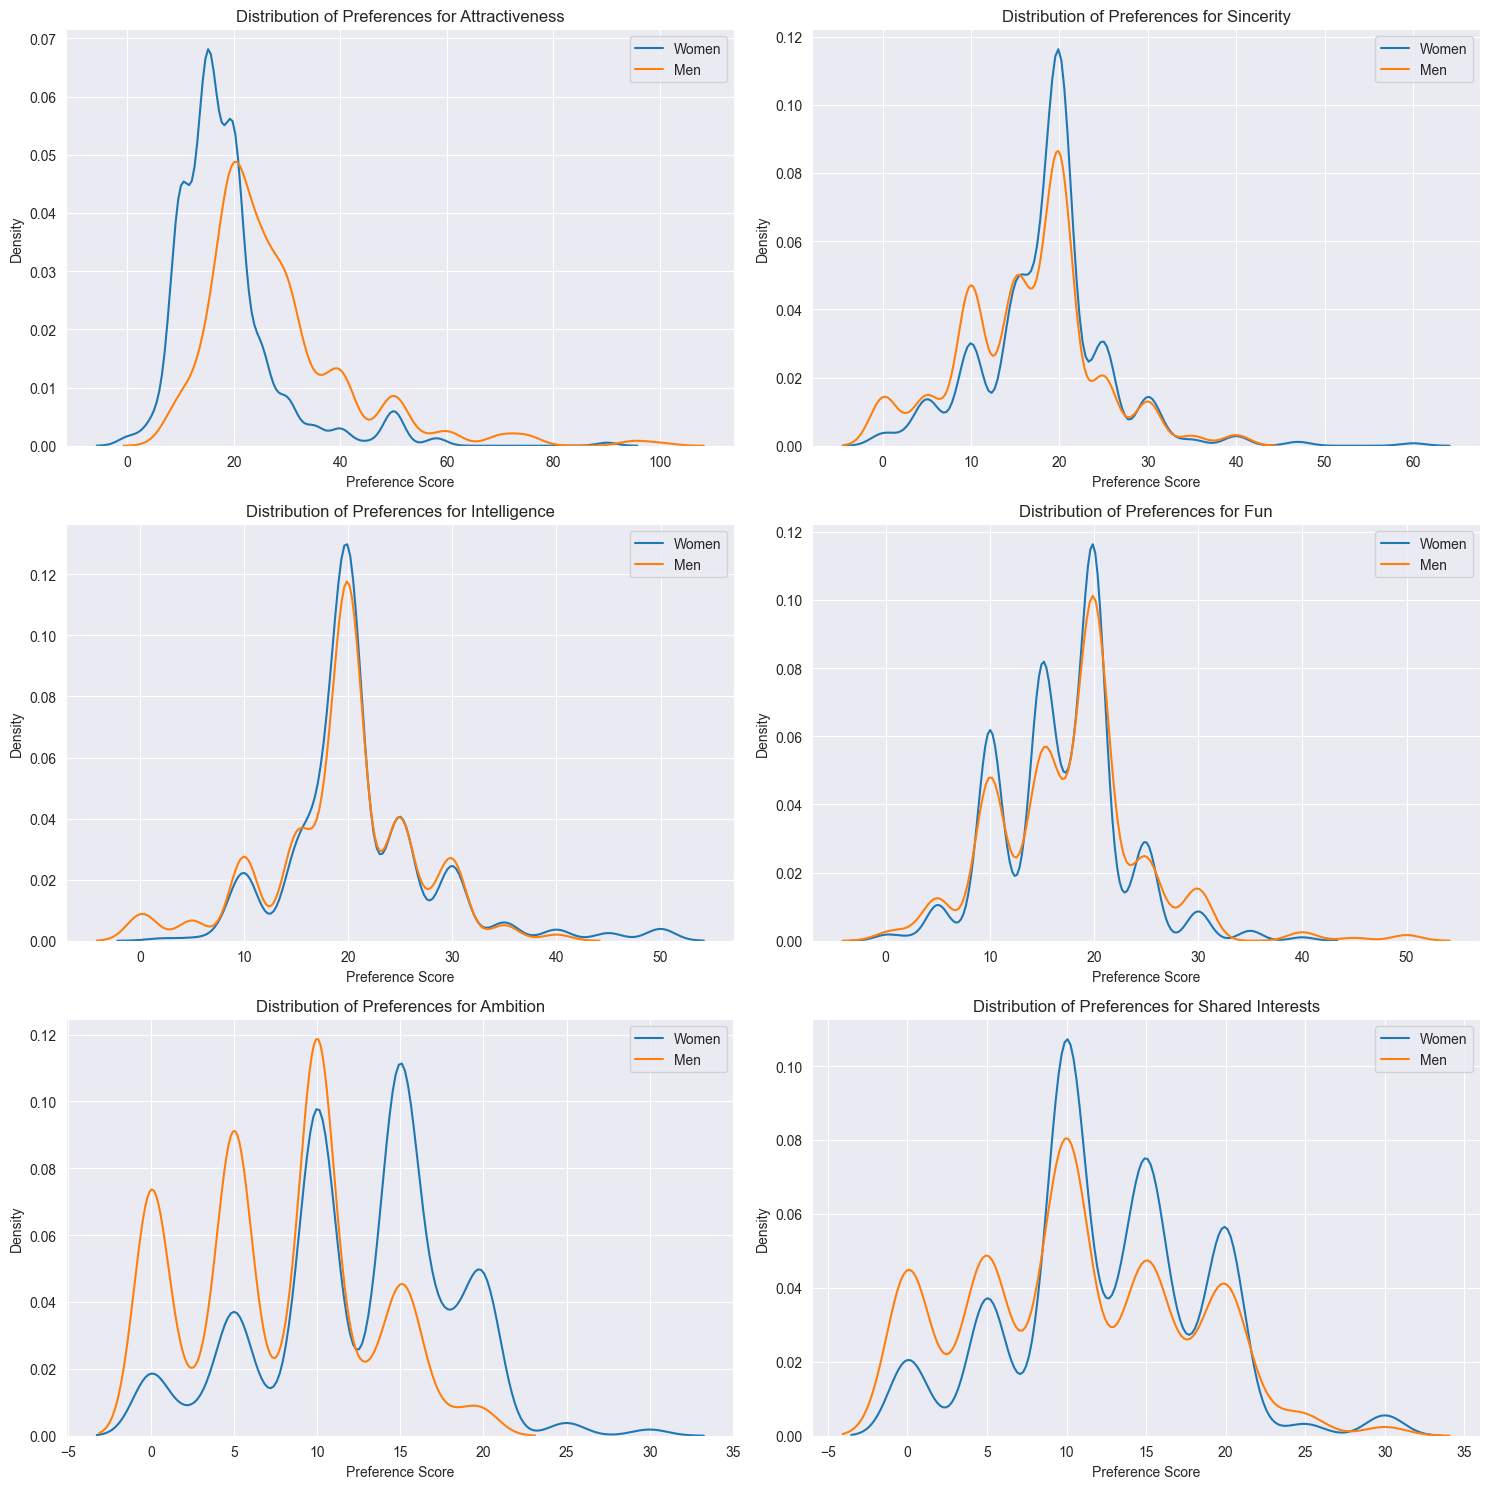

In [7]:
# Select Desired Columns

preferences = ['iid', 'id', 'gender', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
df_pref = df[preferences]

# Remove Rows Where 'iid' is Between 6 and 9

df_pref_clean = df_pref[(df_pref['iid'] < 6) | (df_pref['iid'] > 9)].copy()

# Remove Rows with Missing Values

df_pref_clean.dropna(inplace = True)

# Define Preference Columns

preference_cols = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

# Create a New 'attribute' Column by Summing the Values of Preference Columns

df_pref_clean['attribute'] = df_pref_clean[preference_cols].sum(axis=1)

# Remove Rows Where 'attribute' is Not Equal to 100

df_pref_clean2 = df_pref_clean[df_pref_clean['attribute'] == 100].copy()

# Define Preference Columns and Their Labels

labels_preferences = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', 'Shared Interests']

# Create the Plots

fig, axs = plt.subplots(3, 2, figsize = (15, 15))

for ax, col, label in zip(axs.flatten(), preference_cols, labels_preferences):
    sns.kdeplot(data = df_pref_clean2[df_pref_clean2['gender'] == 0], x = col, ax = ax, label = 'Women')
    sns.kdeplot(data = df_pref_clean2[df_pref_clean2['gender'] == 1], x = col, ax = ax, label = 'Men')
    ax.set_title(f'Distribution of Preferences for {label}')
    ax.set_xlabel('Preference Score')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()


Observation: The charts display the distributions of stated preferences for each attribute, separated by gender. We can observe variations in the distributions depending on the gender of the participant. For instance, women seem to place more importance on ambition and shared interests compared to men, while men prioritize attractiveness more.

How many participants have chosen a partner of the same race ('samerace') ?

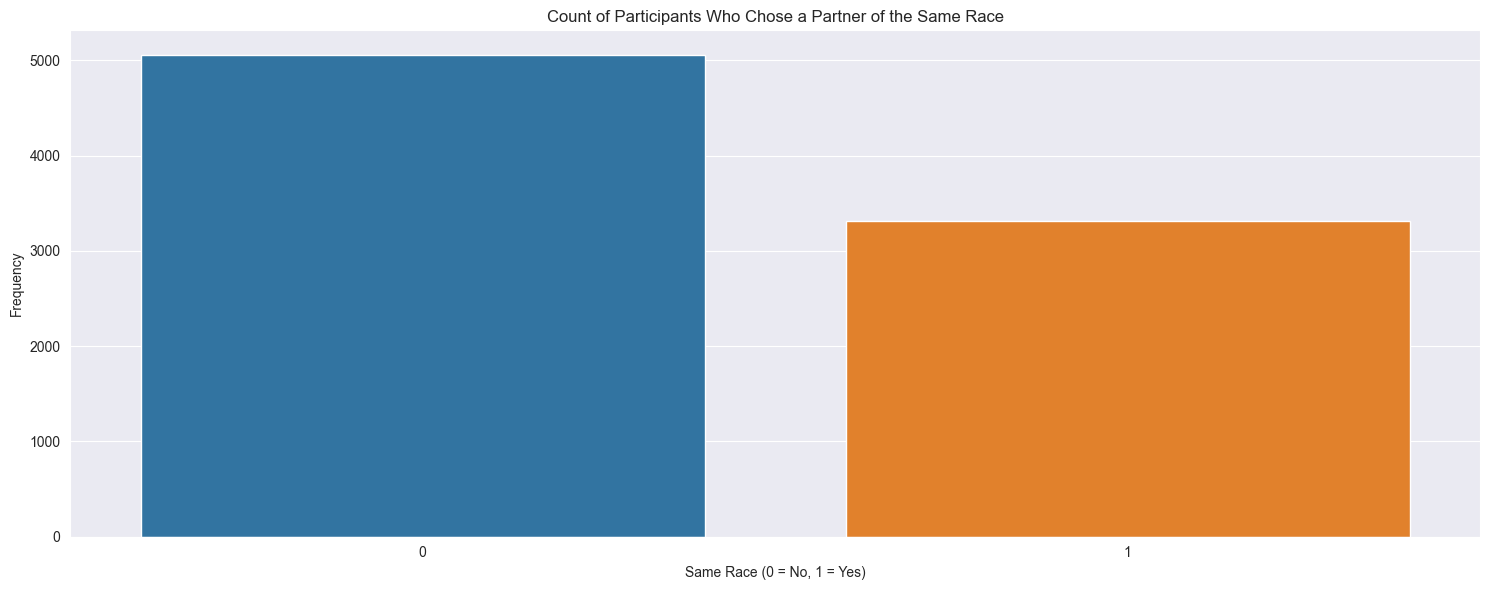

In [8]:
# Number of Participants Who Chose a Partner of the Same Race

plt.figure(figsize = (15, 6))
sns.countplot(data = df[['samerace']].dropna(), x = 'samerace')
plt.title('Count of Participants Who Chose a Partner of the Same Race')
plt.xlabel('Same Race (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Observation: The chart shows that the majority of participants did not choose a partner of the same race (where 'samerace' = 0). This could indicate that race is not a determining factor for most participants when choosing a partner at a speed dating event.

### 5. Bivariate Analysis


What is the match rate based on race ?

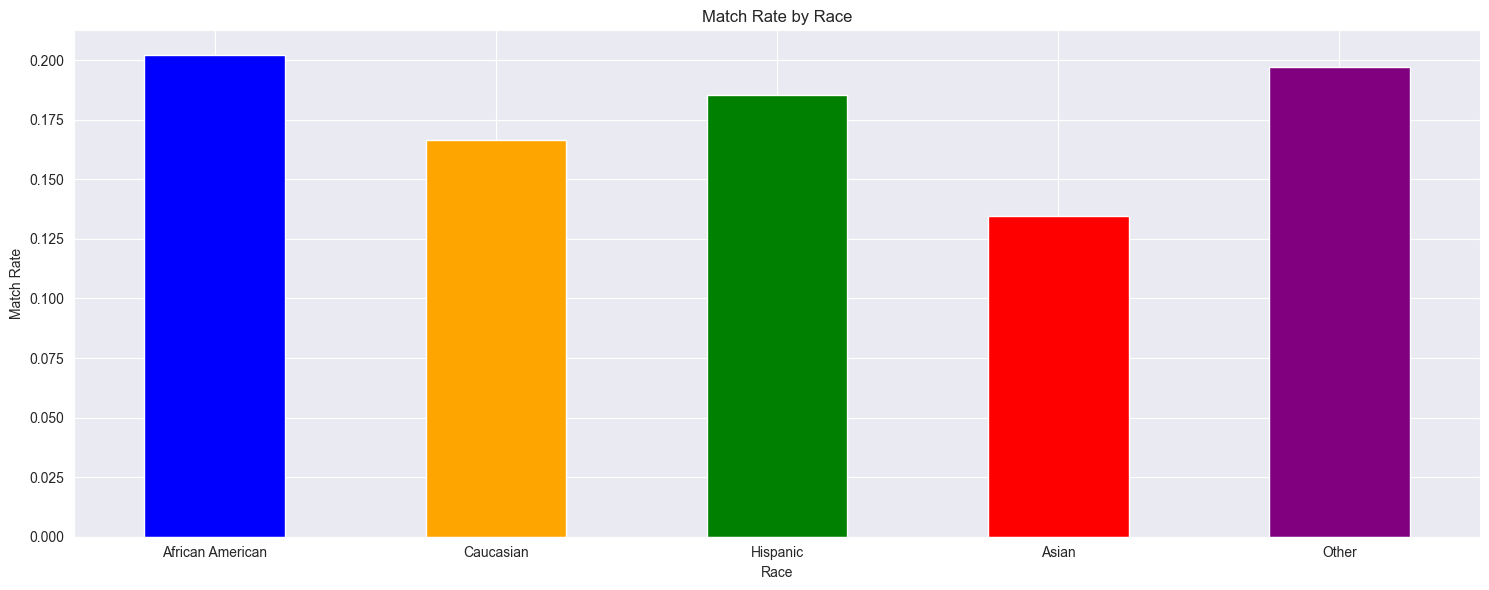

In [9]:
df_race = df[['match', 'race']].dropna()
race_match_rates = df_race.groupby('race')['match'].mean()

# Mapping race categories to provided names

mapping_race = {
    1.0: "African American", 
    2.0: "Caucasian", 
    3.0: "Hispanic", 
    4.0: "Asian", 
    6.0: "Other"
}
race_match_rates_clean = race_match_rates.rename(index = mapping_race)

# Defining a color palette for the bars

color = ['blue', 'orange', 'green', 'red', 'purple']

# Plotting match rate by race

plt.figure(figsize = (15, 6))
race_match_rates_clean.plot(kind = 'bar', color = color)
plt.title('Match Rate by Race')
plt.xlabel('Race')
plt.ylabel('Match Rate')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()


Observation : We notice that match rates are fairly similar with Asians slightly lagging behind. This indicates that there's minimal variation in match choices based on race.

Does the age difference between partners influence the match rate?

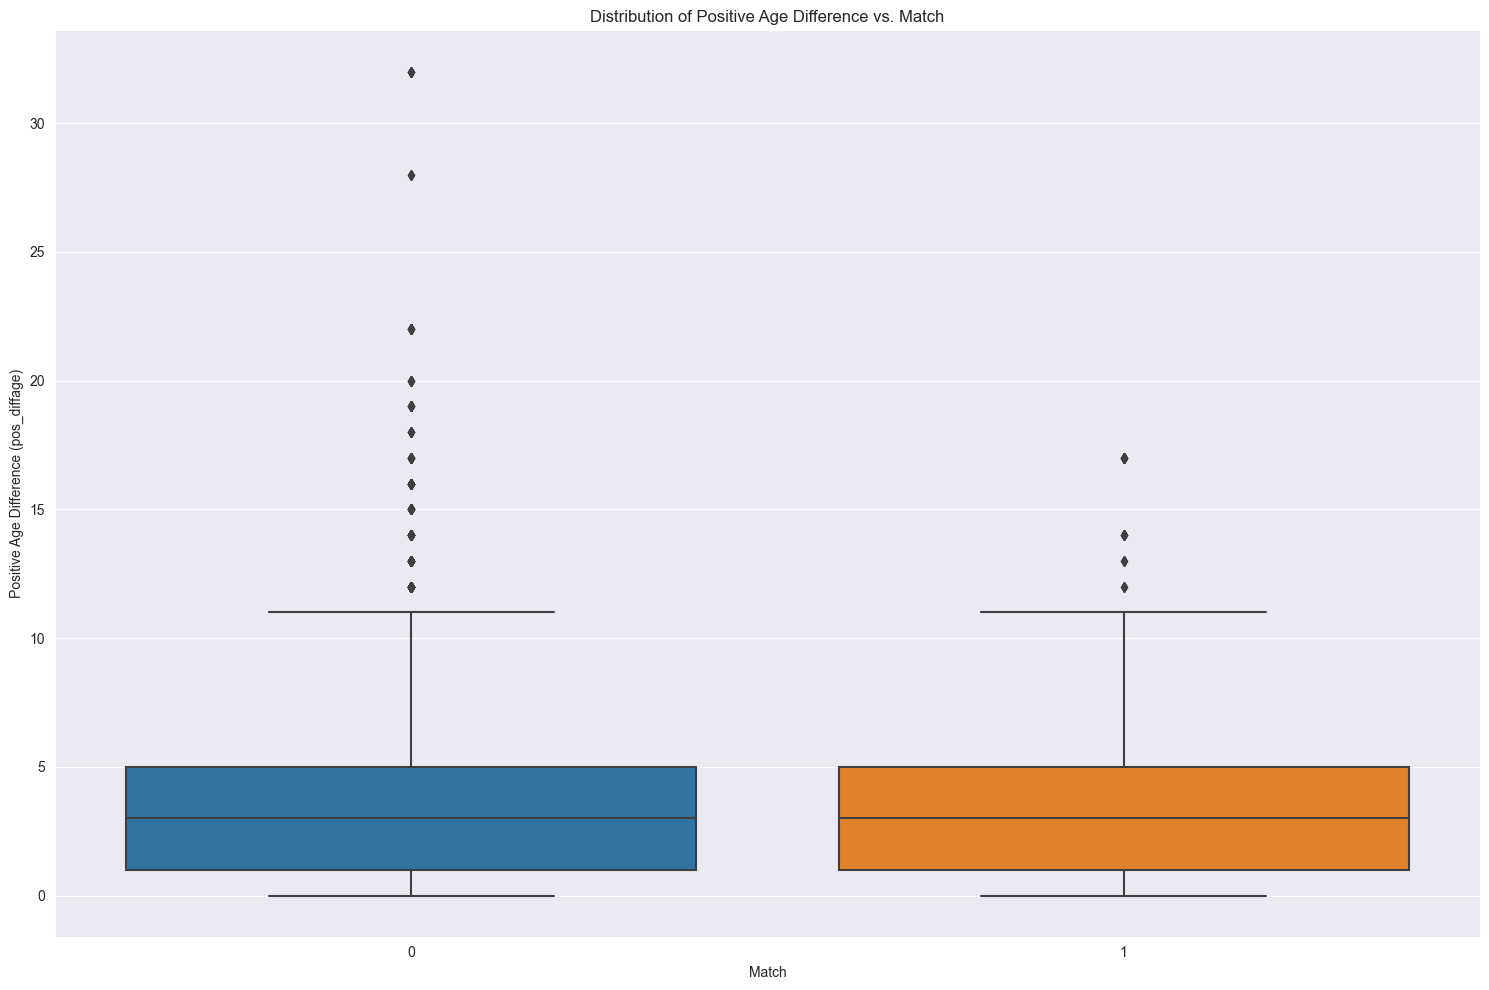

The Spearman correlation coefficient between 'pos_diffage' and 'match' is : -0.07


In [25]:
# Selecting the columns 'match', 'age', and 'age_o'

df_age = df[['match', 'age', 'age_o']]

# Removing rows with missing values

df_age_clean = df_age.dropna().copy()

# Copying the cleaned dataframe

df_age_clean['diff_age'] = df_age_clean['age'] - df_age_clean['age_o']

# Copying the cleaned dataframe

df_diffage = df_age_clean.copy()

# Creating the "pos_diffage" column (positive age difference)

df_diffage['pos_diffage'] = df_diffage['diff_age'].apply(lambda x: abs(x))

# Plotting a box plot to visualize the distribution

plt.figure(figsize = (15, 10))
sns.boxplot(x = "match", y = "pos_diffage", data = df_diffage)
plt.title("Distribution of Positive Age Difference vs. Match")
plt.xlabel("Match")
plt.ylabel("Positive Age Difference (pos_diffage)")
plt.tight_layout()
plt.show()

# Calculating the Spearman's correlation coefficient

correlation = df_diffage['pos_diffage'].corr(df_diffage['match'], method = 'spearman')
print(f"The Spearman correlation coefficient between 'pos_diffage' and 'match' is : {correlation:.2f}")

Observation : We can see that the "pos_diffage" distributions for "match" values 0 and 1 are quite similar. This suggests that there isn't a strong correlation between age difference and match rate.
The value obtained from the Spearman's correlation coefficient is close to zero, confirming our visual observation: there's no strong correlation between positive age difference ("pos_diffage") and match rate ("match").



Is there a correlation between participants' age and their match decisions ?

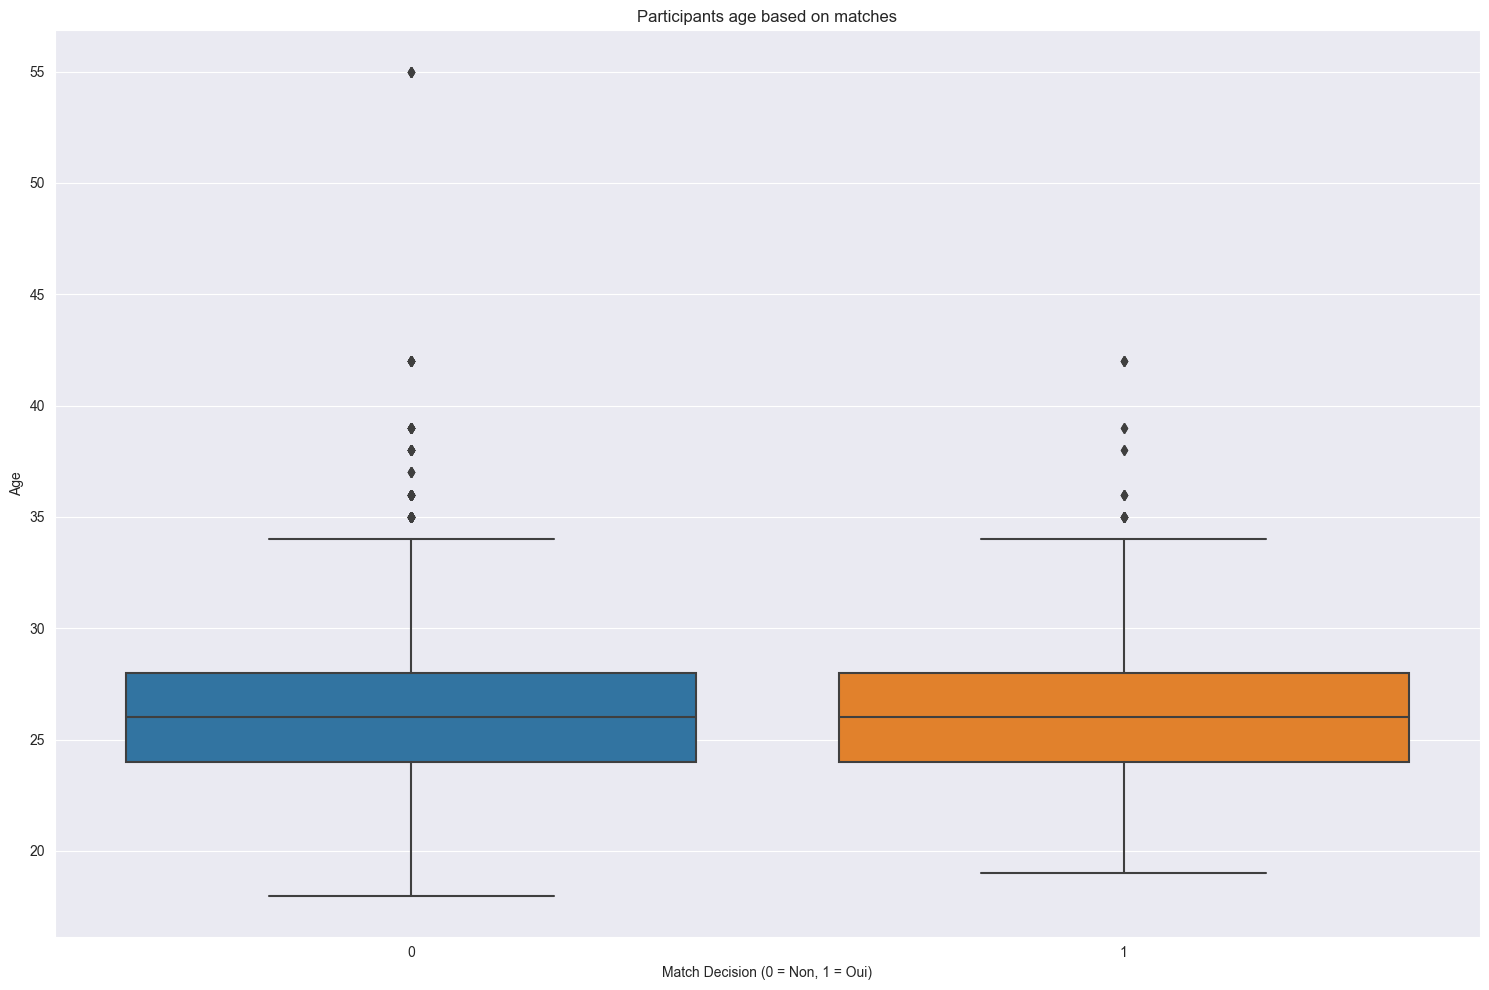

Le coefficient de corrélation de Spearman entre 'pos_diffage' et 'match' est : -0.03


In [24]:
# Correlation between participants' age and match decisions

df3 = df[['match', 'age']].dropna()
plt.figure(figsize=(15, 10))
sns.boxplot(data=df3, x='match', y='age')
plt.title('Participants age based on matches')
plt.xlabel('Match Decision (0 = Non, 1 = Oui)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Calculating the Spearman's correlation coefficient

correlation = df_diffage['age'].corr(df_diffage['match'], method = 'spearman')
print(f"The Spearman correlation coefficient between 'age' and 'match' is : {correlation:.2f}")

Observation: The box plot indicates that the median age of participants who got a match is slightly lower than that of participants who didn't. However, the age distribution is quite similar for both groups, suggesting that age doesn't have a significant impact on the match decision.

Is there a difference in preferences or match decisions based on participants' field of study ?

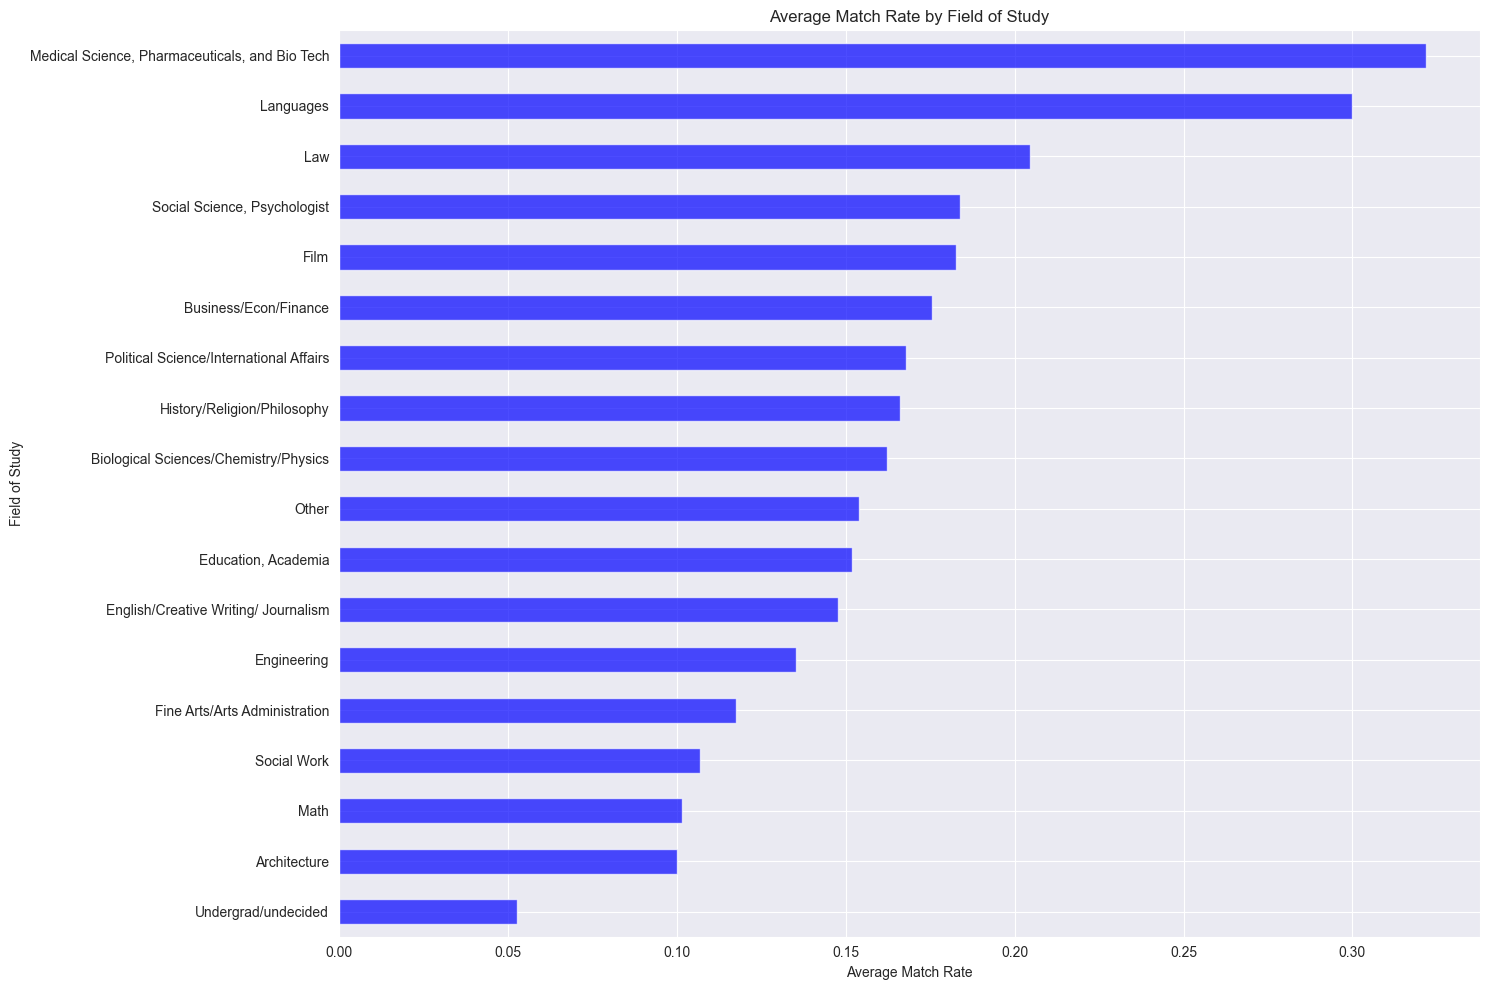

In [16]:
# Mapping fields of study using the documentation

field_mapping = {
    1: 'Law',
    2: 'Math',
    3: 'Social Science, Psychologist',
    4: 'Medical Science, Pharmaceuticals, and Bio Tech',
    5: 'Engineering',
    6: 'English/Creative Writing/ Journalism',
    7: 'History/Religion/Philosophy',
    8: 'Business/Econ/Finance',
    9: 'Education, Academia',
    10: 'Biological Sciences/Chemistry/Physics',
    11: 'Social Work',
    12: 'Undergrad/undecided',
    13: 'Political Science/International Affairs',
    14: 'Film',
    15: 'Fine Arts/Arts Administration',
    16: 'Languages',
    17: 'Architecture',
    18: 'Other'
}

# Replacing field of study codes with their names in the DataFrame

df['field_cd'] = df['field_cd'].replace(field_mapping)

# Calculating averages and visualizing average matches by fields of study

df.groupby('field_cd')['match'].mean().sort_values(ascending = False).plot(kind = 'barh', figsize = (15, 10), color = 'blue', alpha = 0.7)
plt.title('Average Match Rate by Field of Study')
plt.xlabel('Average Match Rate')
plt.ylabel('Field of Study')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Observation: The chart displays the match rate for the most commonly represented fields of study among participants. It's evident that match rates differ considerably depending on the field of study, suggesting that one's field of study might influence match decisions.

Is there a difference in preferences or match decisions based on the stated purpose of participants attending the speed dating event ?

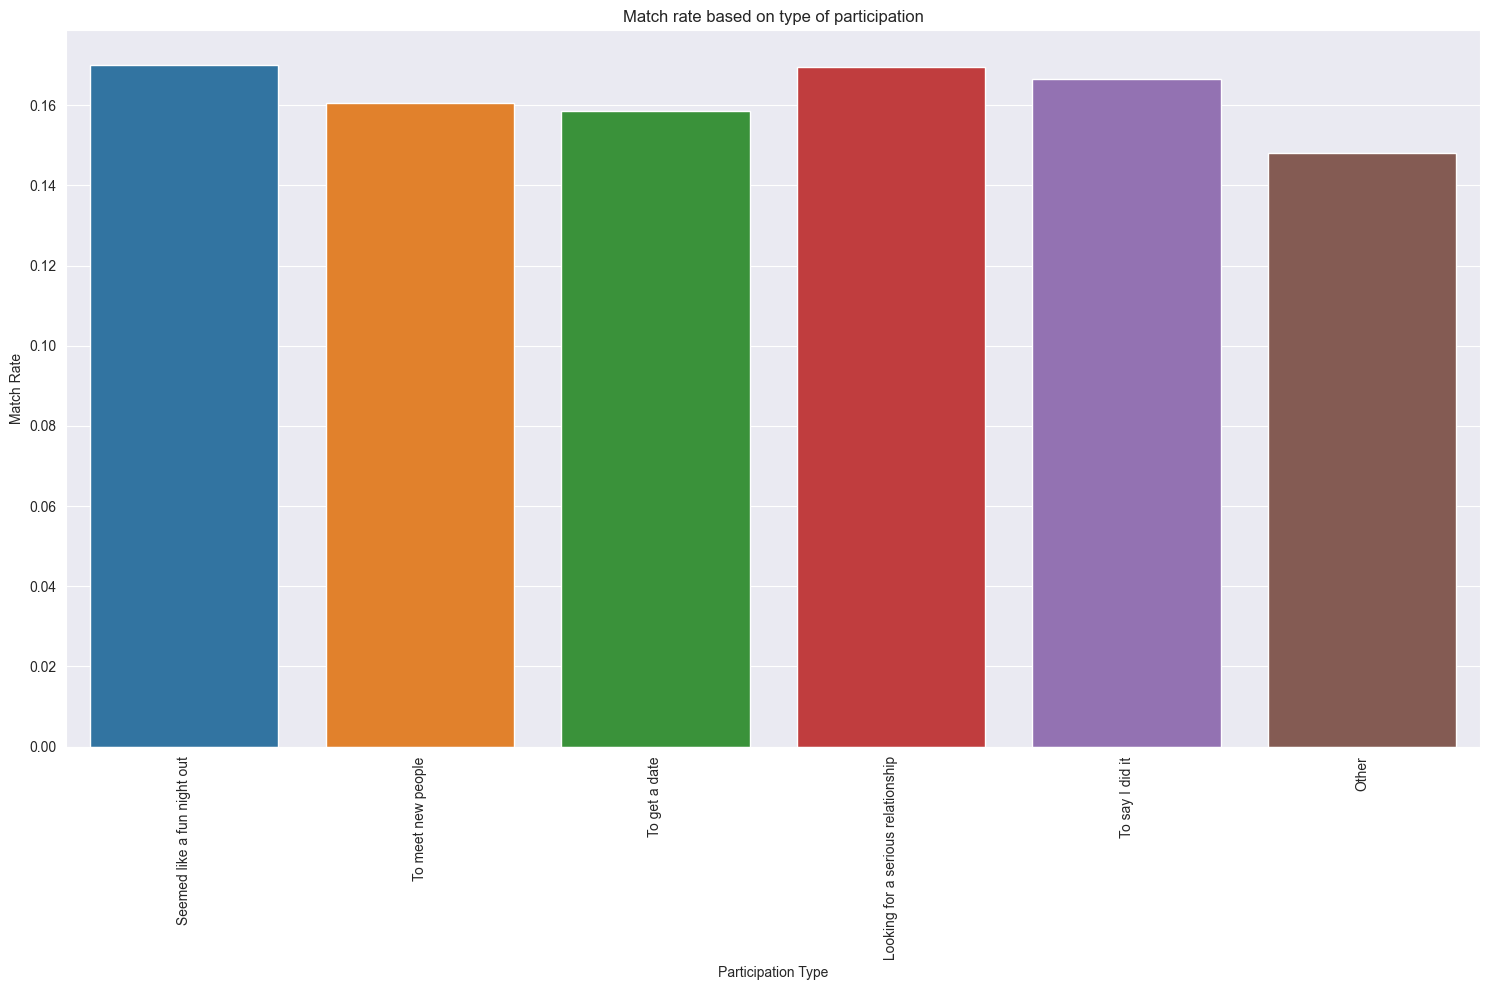

In [13]:
# Difference in match decisions based on the purpose of participation

df1 = df[['goal', 'match']].dropna()
goal_match_rates = df1.groupby('goal')['match'].mean()

plt.figure(figsize = (15, 10))
sns.barplot(x = goal_match_rates.index, y = goal_match_rates.values)
plt.title('Match rate based on type of participation')
plt.xlabel('Participation Type')
plt.xticks(ticks = range(6), labels = ['Seemed like a fun night out', 'To meet new people', 'To get a date', 'Looking for a serious relationship', 'To say I did it', 'Other'])
plt.xticks(rotation = 90)
plt.ylabel('Match Rate')
plt.tight_layout()
plt.show()


Observation : The chart displays the match rate relative to the stated purpose of attending the speed dating event. We can see that match rates fluctuate based on the purpose of participation. Participants who were there to "seek a serious relationship" or because it "seemed like a fun night out" tend to have higher match rates.

### 6. Multivariate Analysis

What attributes are most strongly correlated with getting a 'yes' for a second date as per the partner's opinion ?

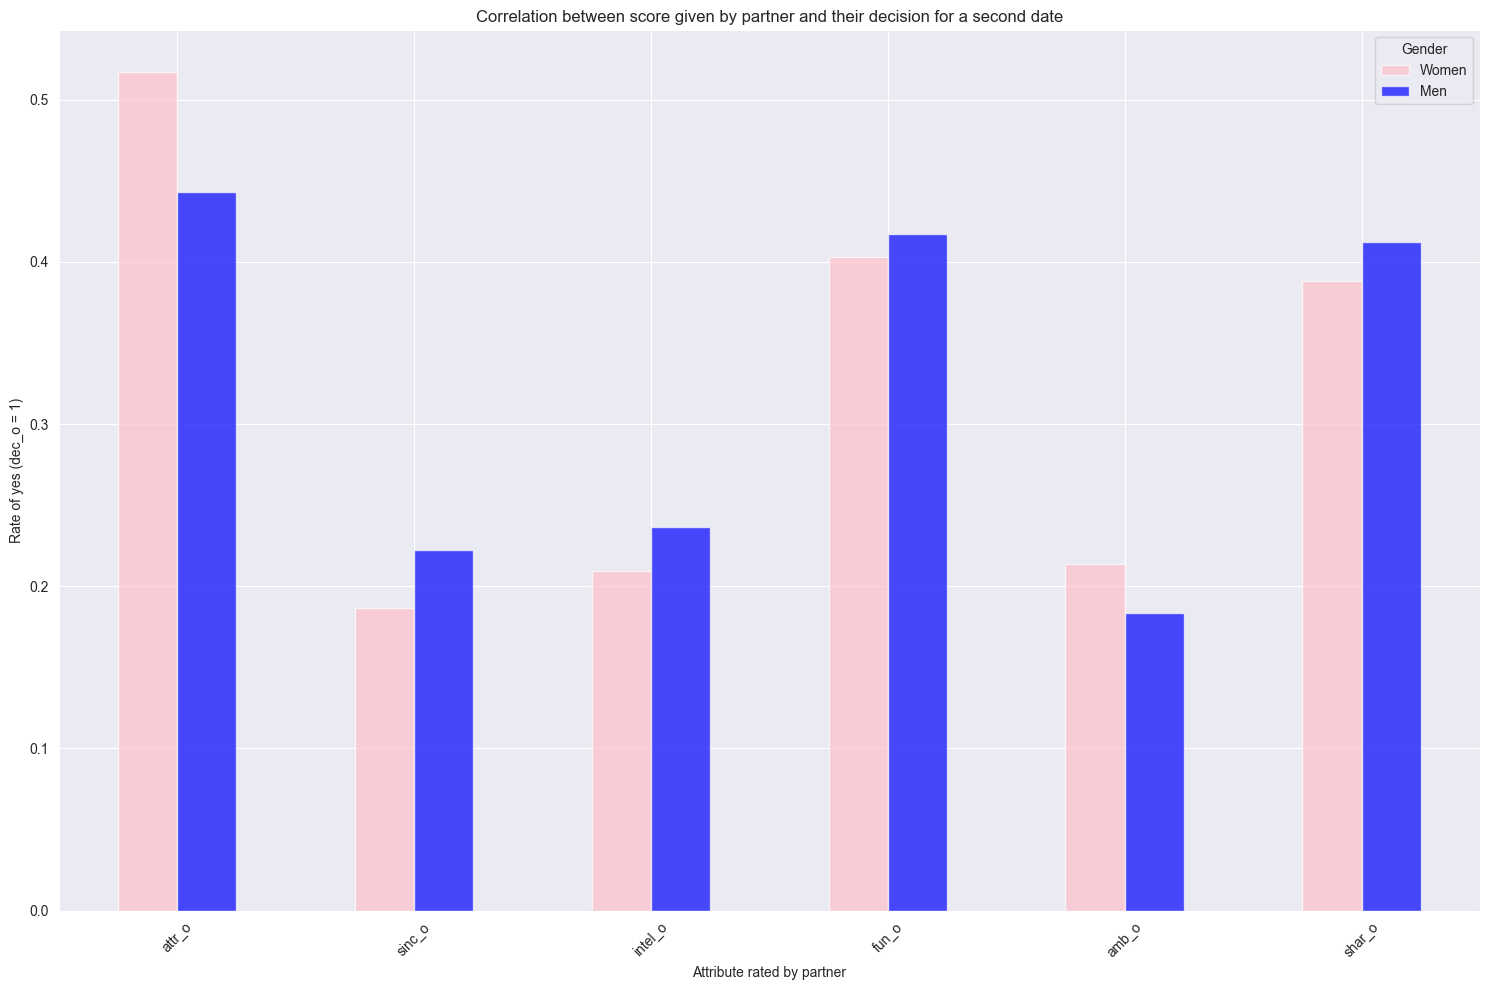

In [17]:
# Creating a new DataFrame with relevant columns

df_dec = df[['gender', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]

# Defining attribute columns

attributes_columns = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']

# Eliminating rows with missing values

df_dec = df_dec.dropna()

# Calculating correlation between each attribute and 'dec_o' for each gender

correlations_attributes_dec_o = {}
for column in attributes_columns:
    correlations_attributes_dec_o[column] = (
        df_dec[df_dec['gender'] == 0][[column, 'dec_o']].corr().iloc[0, 1],
        df_dec[df_dec['gender'] == 1][[column, 'dec_o']].corr().iloc[0, 1]
    )

correlations_attributes_dec_o

# Converting correlation dictionaries into DataFrame

correlations_df = pd.DataFrame(correlations_attributes_dec_o, index=['Women', 'Men']).T

# Creating a bar plot of correlations

correlations_df.plot(kind = 'bar', figsize = (15, 10), alpha = 0.7, color = ['pink', 'blue'])
plt.title('Correlation between score given by partner and their decision for a second date')
plt.xlabel('Attribute rated by partner')
plt.ylabel('Rate of yes (dec_o = 1)')
plt.legend(title = 'Gender')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Observation : As can be seen, for both men and women, the attributes of attractiveness (attr_o), sense of fun (fun_o), and shared interests (shar_o) are the most influential in securing a second date.
Notably, for women, the attractiveness attribute is very strongly correlated (>50%) with obtaining a second date.

What is the correlation between attributes given by partners on the scorecards ?

In [ ]:
correlation = df[['dec', 'attr','sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']].dropna().corr()
plt.figure(figsize = (20,10))
sns.heatmap(correlation, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title('Correlation between Attributes and Match Decision')
plt.tight_layout()
plt.show()

Observation : One can observe a strong correlation between attractiveness and the partner's decision, as well as the 'yes' decision (dec) and the appreciation for the person (like). Most notably, 'like' is highly correlated with the attributes of attractiveness, sense of fun, and shared interests.

Is there any benefit to communicating with a partner where a match occurred following the event ?

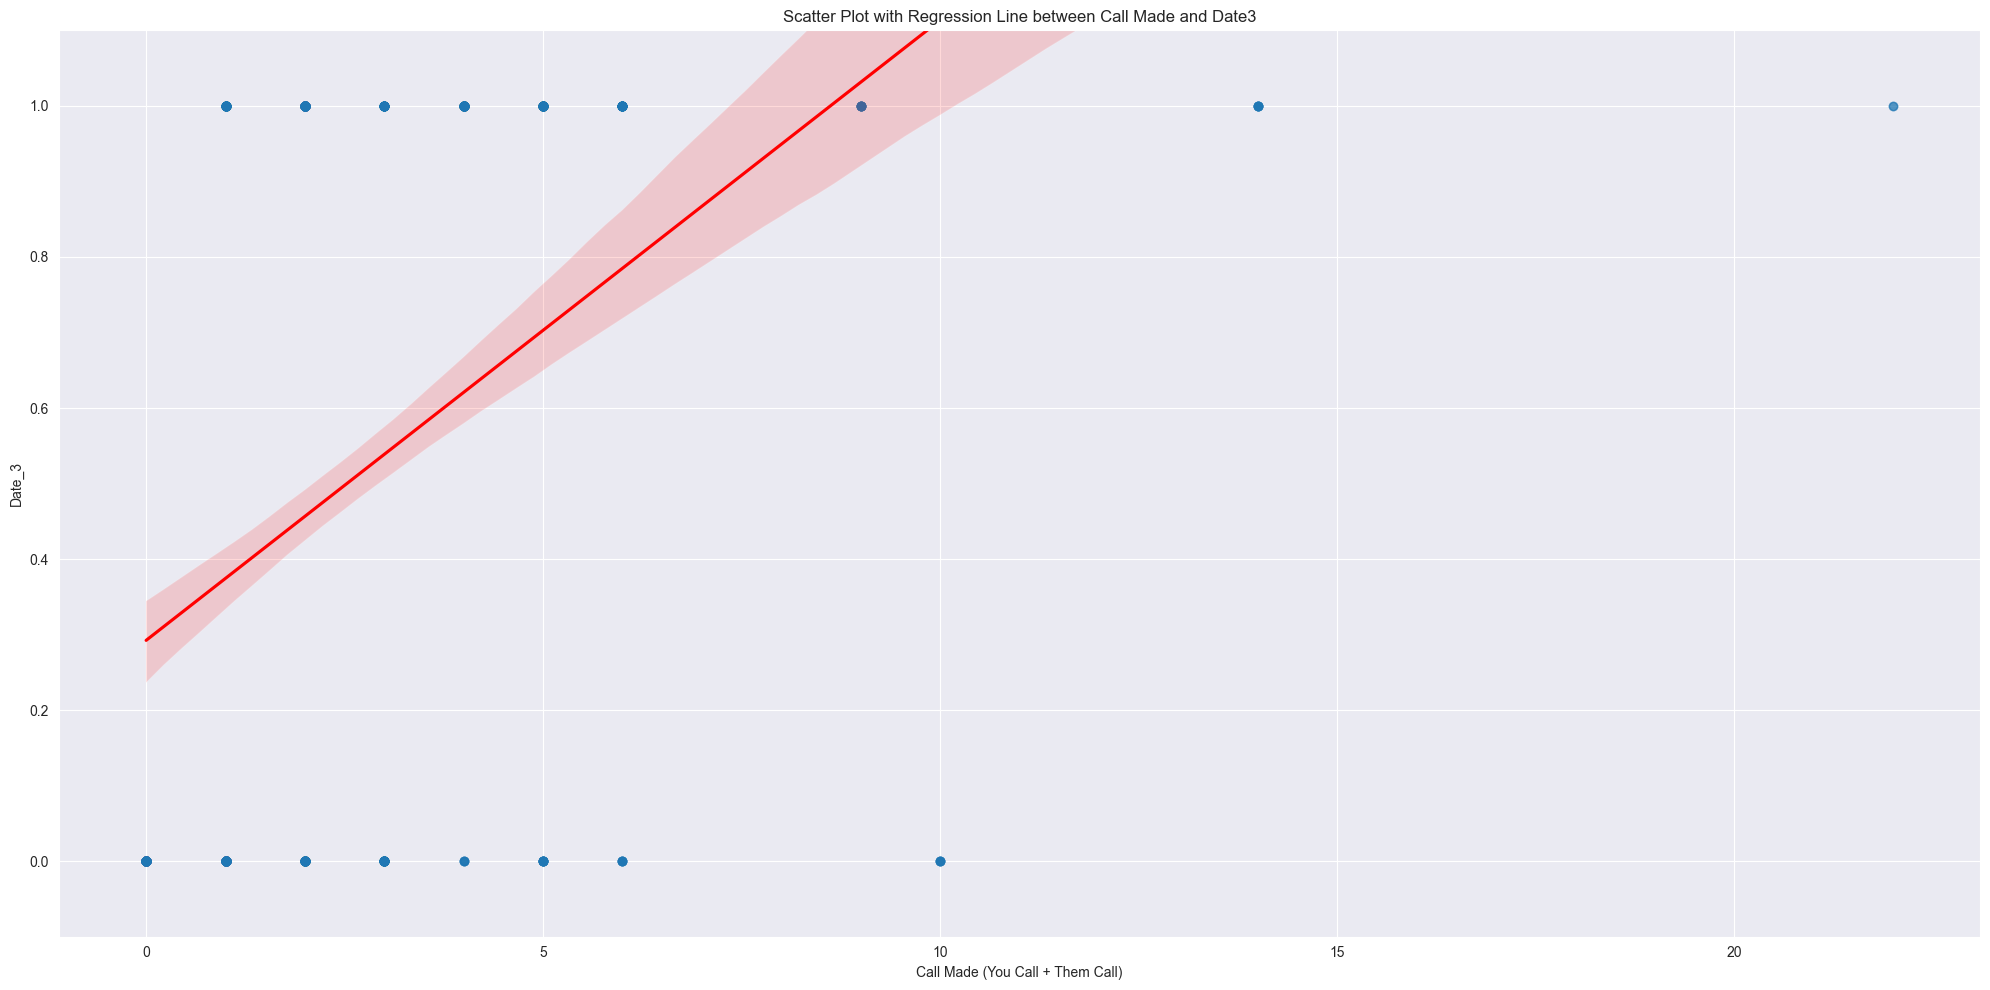

Spearman's Correlation between 'call_made' and 'date3': 0.5361475174558188


In [27]:
# Selecting and renaming columns

df_call = df[['you_call', 'them_cal', 'match', 'date_3']]

# Filtering rows where 'match' is equal to 1

df_callmatch = df_call[df_call['match'] == 1].copy()

# Adding the 'call_made' column and eliminating missing values

df_callmatch['call_made'] = df_callmatch['you_call'] + df_callmatch['them_cal']
df_callmatch_clean = df_callmatch.dropna()

# Calculating the Spearman correlation between 'call_made' and 'date3'

spearman_correlation = df_callmatch_clean['call_made'].corr(df_callmatch_clean['date_3'], method = 'spearman')

# Creating a regplot with a regression line

plt.figure(figsize = (20, 10))
sns.regplot(x = 'call_made', y = 'date_3', data = df_callmatch_clean, scatter_kws = {'alpha':0.5}, line_kws = {'color':'red'})
plt.title('Scatter Plot with Regression Line between Call Made and Date3')
plt.xlabel('Call Made (You Call + Them Call)')
plt.ylabel('Date_3')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying the Spearman correlation

print(f"Spearman's Correlation between 'call_made' and 'date3': {spearman_correlation}")

Observation : This chart demonstrates a strong correlation between communicating with matches after the event and the intention of securing a second date. As communication increases, the likelihood of obtaining a second date also rises.

How do attribute scores influence the decision of a match ?

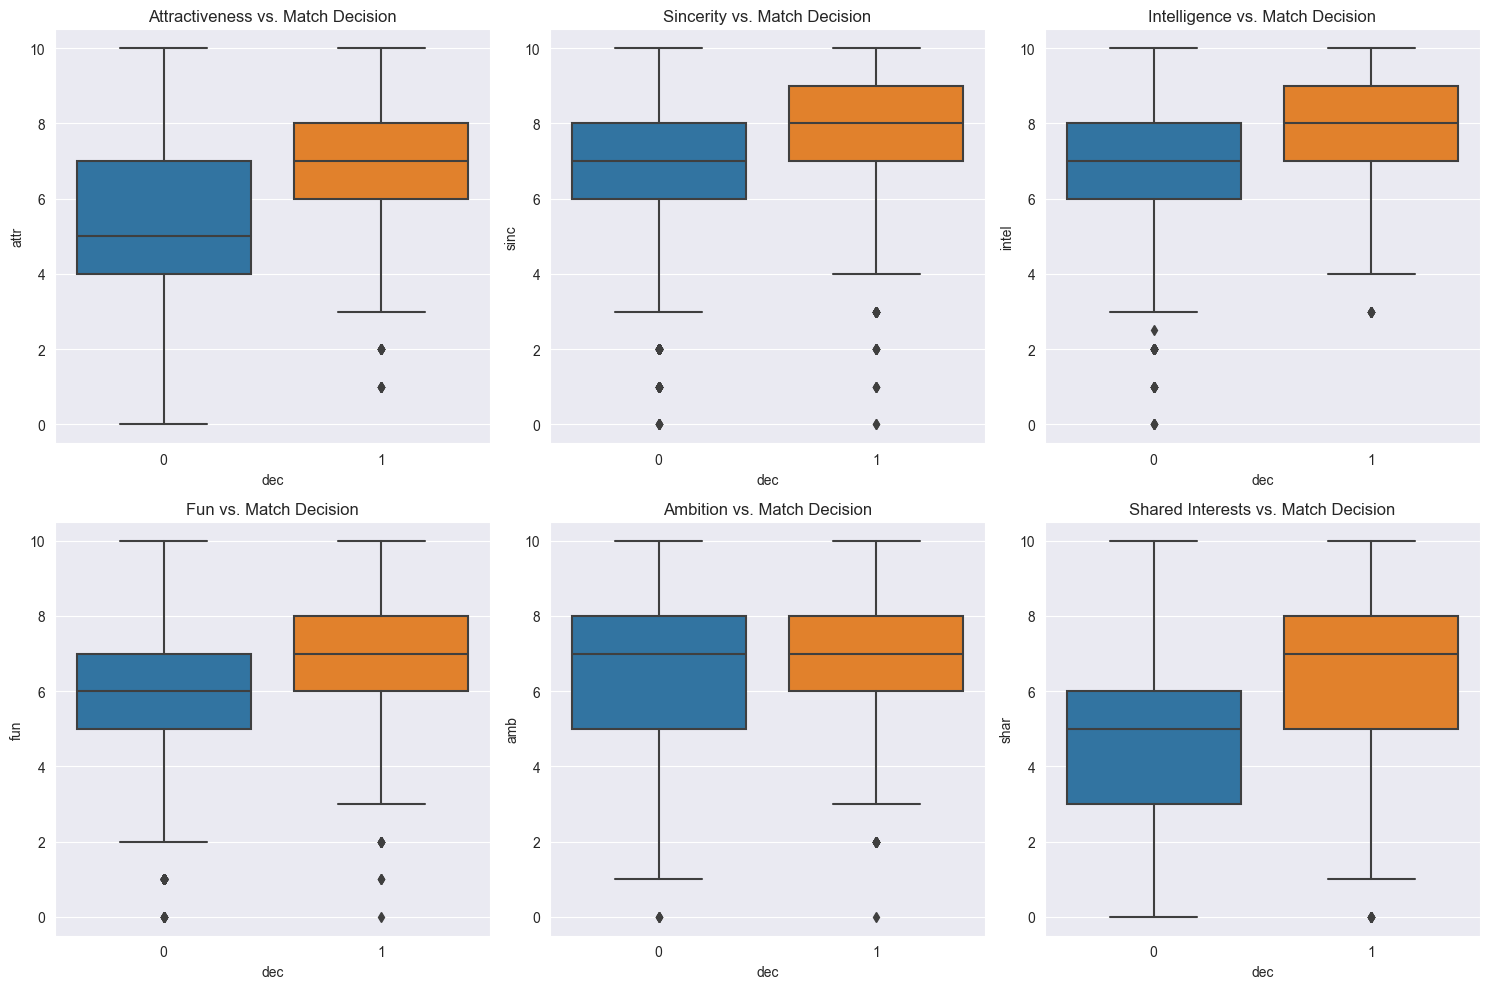

In [20]:
# Creating boxplots for each attribute

fig, axs = plt.subplots(2, 3, figsize = (15, 10))
attributes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
titles = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', 'Shared Interests']

for ax, attribute, title in zip(axs.flatten(), attributes, titles):
    sns.boxplot(ax = ax, data = df, x = 'dec', y = attribute)
    ax.set_title(f'{title} vs. Match Decision')

plt.tight_layout()
plt.show()

Observation : From these plots, it's evident that the higher the attribute scores, the greater the probability of a match. However, an exception is observed for ambition, where the median score remains consistent regardless of a match or no match.

Is there a correlation between the attractiveness ratings participants give themselves and the ratings given by partners ?

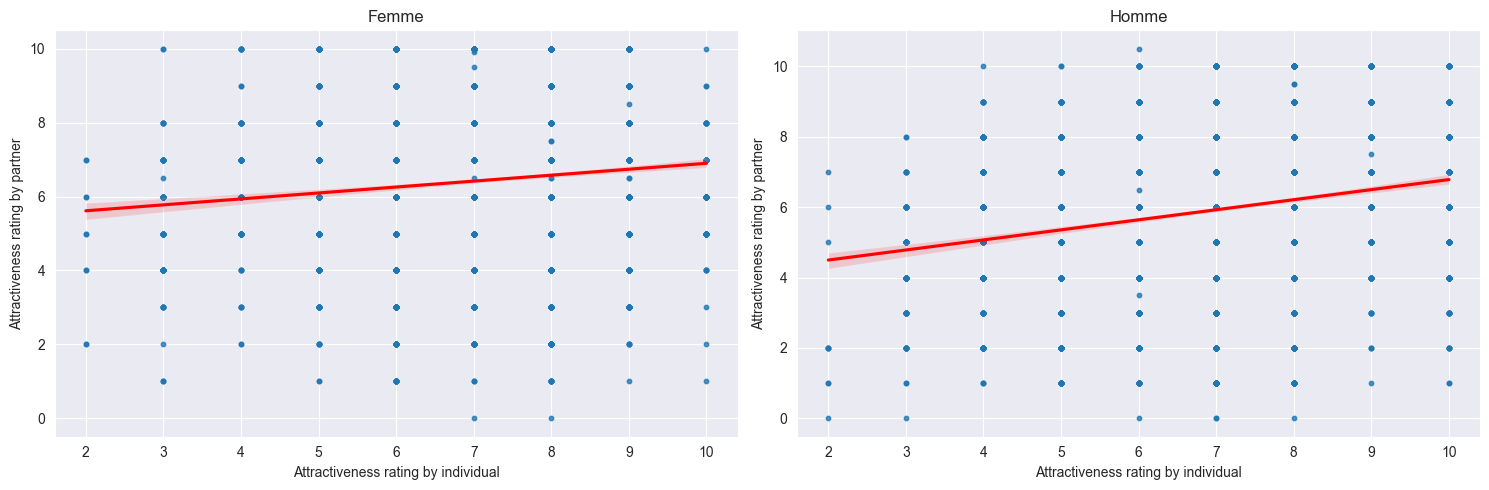

Pearson's Correlation for females: 0.11538418046526815
Pearson's Correlation for males: 0.20552546793014645


In [21]:
# Selecting columns and removing missing values

df_attr = df[['gender', 'attr3_1', 'attr_o']].dropna()

# Creating regplots for each gender

plt.figure(figsize = (15, 5))

# Regplot for gender 0 (Female)

plt.subplot(1, 2, 1)
sns.regplot(x = 'attr3_1', y = 'attr_o', data = df_attr[df_attr['gender'] == 0], scatter_kws = {'s': 10}, line_kws = {'color': 'red'})
plt.title('Femme')
plt.xlabel("Attractiveness rating by individual")
plt.ylabel("Attractiveness rating by partner")

# Regplot for gender 1 (Male)

plt.subplot(1, 2, 2)
sns.regplot(x = 'attr3_1', y = 'attr_o', data = df_attr[df_attr['gender'] == 1], scatter_kws = {'s': 10}, line_kws = {'color': 'red'})
plt.title('Homme')
plt.xlabel("Attractiveness rating by individual")
plt.ylabel("Attractiveness rating by partner")

plt.tight_layout()
plt.show()

# Calculating Pearson's correlation for each gender

correlation_female = df_attr[df_attr['gender'] == 0][['attr3_1', 'attr_o']].corr().iloc[0, 1]
correlation_male = df_attr[df_attr['gender'] == 1][['attr3_1', 'attr_o']].corr().iloc[0, 1]

# Displaying the correlations

print("Pearson's Correlation for females:", correlation_female)
print("Pearson's Correlation for males:", correlation_male)

Observation : We note that the correlations are relatively weak, suggesting that individuals, both men and women, struggle to accurately gauge their level of attractiveness in comparison to the scores assigned by their partners.

### 7. Insights and Recommendations

- **Key Findings :**

This analysis has unearthed several intriguing insights into the factors that influence match decisions during speed dating events. Attractiveness appears to play a pivotal role, whereas ambition is less valued. The field of study has a significant influence on the match decision, contrary to belonging to the same ethnic group. Participants tend to misjudge their attractiveness and perceived market value in the dating scene. Lastly, post-match communication seems to play a key role in securing a second date outside of the event.


- **Recommandations :** Based on the findings of our analysis, we can formulate the following recommendations :

**Target a Broader Audience** : Our study showed no influence from age, age difference, or even race. Therefore, it would be beneficial to cater to a broader audience to increase the chances of matches. Efforts should be made to convert as many singles as possible to use the application.

**Emphasize Attractiveness** : Attractiveness was a key feature in match decisions, irrespective of age and gender. Features could be incorporated that highlight the attractiveness of users, such as a robust profile picture system or filters, or even predefined settings for the app's photo tool.

**Promote Shared Interests** : Shared interests played a role in match decisions. Users could be encouraged to share their interests and look for people with similar interests. An "Interests" section on the profile that is visible to other users could be added, and it could even be integrated into the profile selection algorithm.

**Encourage Post-Match Communication** : Participants who communicated after the event were more likely to secure a second date. The app could encourage users to continue communicating after a match, perhaps by providing conversation starters or offering rewards for engagement.

**Offer Personalized Advice** : Participants' self-reported perception scores often differed from their perceived values. The app could offer personalized advice to users on how to improve their chances of a match, for example, by showing them how their preferences compare to others.

### 8. Conclusion

This marks the end of our study; we were able to explore various avenues and unearth some interesting insights to address the challenges faced by our Marketing team. These insights can help them increase the number of user matches and thereby enhance long-term user engagement. While these findings provide valuable insights into the dating preferences and behaviors of participants in these speed dating events, it's important to note that these findings are specific to this dataset and may not be generalizable to other contexts or populations. Further analyses could be conducted using the unused variables in this study to discover new insights.